# Activation Functions

In this time, we are discussing activation functions. Activation functions are an extremely important part of neural networks. Let's look at what they are, why are the used, what different types there are, and how we apply them in `pytorch`.

Activation functions apply a non-linear transformation to the layer output and decide whether a neuron in the neural network should be activated or not. 

So, why is a linear transformation not good enough. Typically we have a linear layer in our neural network that applies a linear transformation, as in below.

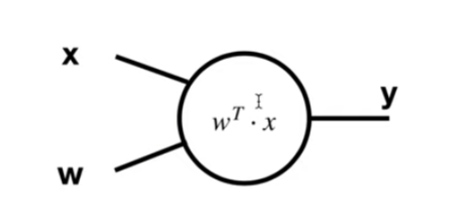

The linear layer multiplies some inputs with weights (maybe adds a bias) and then gives the output. Suppose we do not have any activation functions in-between; without activation functions our network is basically just a stacked linear regression model. 

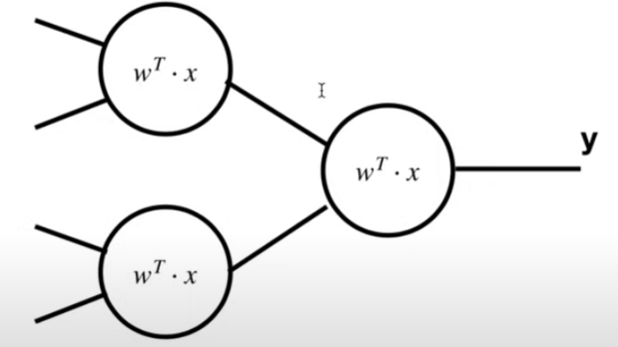

This linear model is not suited for more complex tasks. With non-linear transformations in-between our layers, our network can learn better and perform more complex tasks. Aftert each layer, we typically use an activation function. 

Below, we can see the activation functions around each layer. We have a normal linear layer $w^{T} \cdot x$ wrapped in the activation function $f()$.

The most popular activation functions are:

* Step function
* Sigmoid
* TanH
* ReLU
* Leaky ReLU
* Softmax

Let's start with the step function:

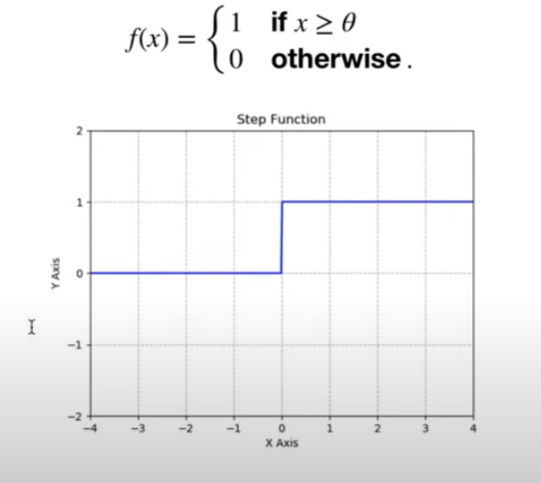

This one is very simple: if the input is greater than a threshold, then we output 1, 0 otherwise. This is not really used in practice. 

A more popular choice is the sigmoid function: 

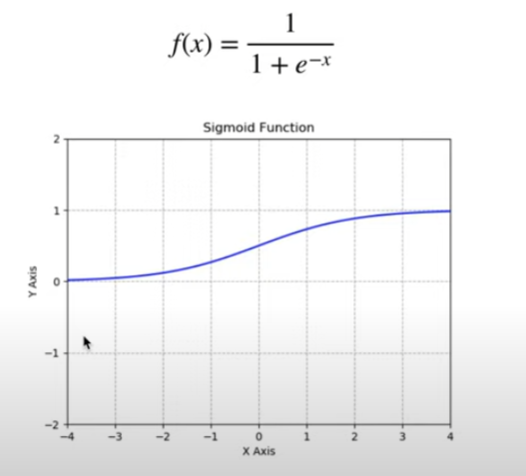

This is typically in the last layer of a binary classification problem. This will output a probability between 0 and 1. 

Then we have the hyperbolic tanget function, or TanH: 

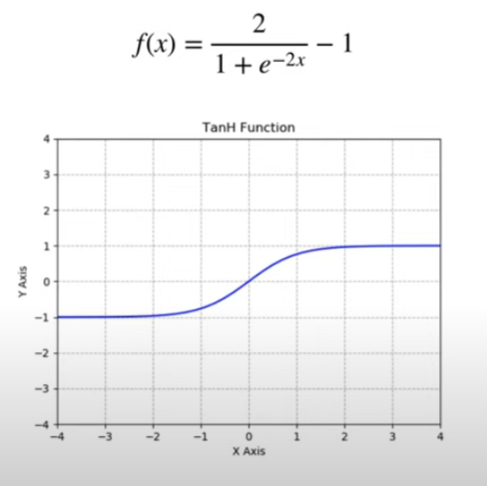

This is basically a scaled sigmoid function and a little bit shifted. It will output a value between -1 and +1. This is a good choice in hidden layers.

Then we have the ReLU function, which is the most popular choice in many networks: 

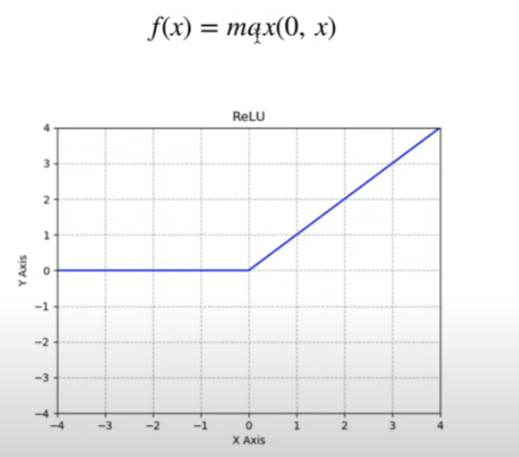

This will output 0 for negative values and output the input as output for positive values. This a linear function for values greater than 0. It is 0 for negative values. It does not that different from linear functions, but it is not linear. This is typically a very good choice for an activation function. If you don't know which function to use for hidden layers, pick ReLU.

Then we have the Leaky ReLU function: 

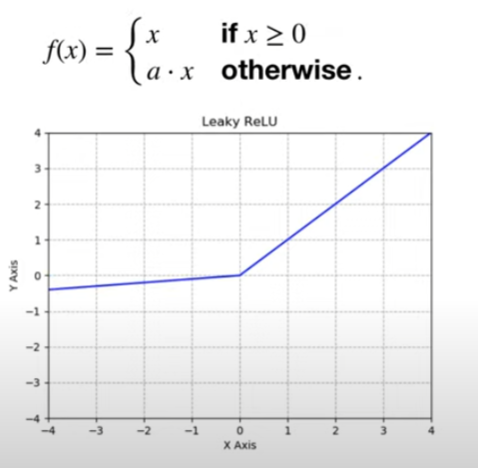

This is slightly modified and slightly improved version of the ReLU. For $X \ge 0$, it will output the input. But, it will multiply our input with a very small value for negative values and a is typicall very small, like 0.001. This tries the vanishing gradient problem. With a normal ReLU, our values below 0 are 0. This means that the gradient later in the backpropagation is 0. When the gradient is 0, it means these weights will never be updated. The neurons will never learn anything and they will be "dead". 

when you notice your weights don't update during training, try using a Leaky ReLU instead of a normal ReLU.

Last, we have the Softmax activation function:

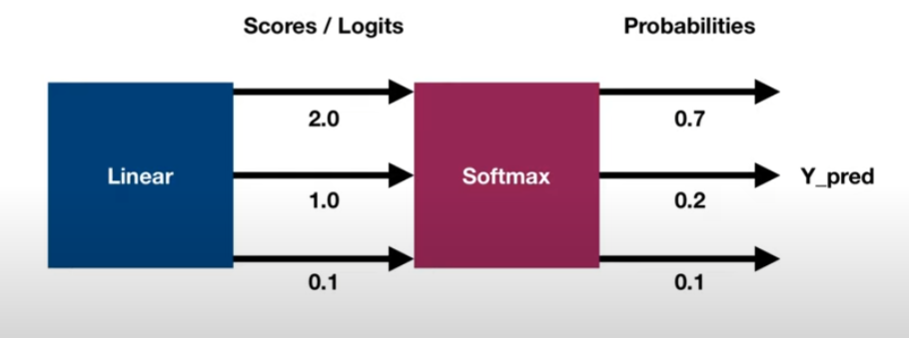

This will basically squash the inputs to be outputs between 0 and 1, so that we have a probability as an output. This is a good choice in the last layer of a multi class classification problem. 

Let's load our modules.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Below, we can see some coded examples out the activation functions.

In [6]:
x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


Now, let's jump to the code and see how we can use them in `pytorch`. We have 2 options. The first option is to create functions as `nn.Modules`.

In [3]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        #first we define all the layers we want to have 
        self.linear1 = nn.Linear(input_size, hidden_size) #linear
        self.relu = nn.ReLU() #ReLU from torch.nn
        self.linear2 = nn.Linear(hidden_size, 1) #linear layer
        self.sigmoid = nn.Sigmoid() #next activation is a sigmoid at the end
    
    def forward(self, x):
        #in the forward pass, we call the layers after each other 
        #then we put the output through all the layers
        out = self.linear1(x) 
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

The second option is that we use activation functions directly in the forward pass.

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        #only define our linear layers
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x)) #linear layer with ReLU
        out = torch.sigmoid(self.linear2(out)) #sigmoid with second linear layer
        return out

Both of these achieve the same thing. All the functions we discussed earler come from the `torch.nn` module. We can also have `nn.Sigmoid`, `nn.Softmax`, `nn.TanH`, and `nn.LeakyReLU`. They are also available in the `torch` API as `torch.softmax`, `torch.tanh`, etc. 

However, sometimes the activation functions will not be available in the `torch.nn` module, so we have to use the `torch.nn.functional` module instead. Then we can call, for example, `import torch.nn.functional as f` followed by `F.leaky_relu()` which is only available in the `torch.nn.functional` API.